# Fatemeh Goudarzi

# Final Exam

## 1) Question 1: Data Understanding

In [21]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import ParameterSampler
from sklearn import metrics
from graphviz import Source
# Set display settings
pd.set_option('display.max_colwidth', 80)

In [31]:
# Change the default path
path='../data'
os.chdir(path)

In [32]:
# Read the datasets
user_features=pd.read_csv("user_features.csv")
product_features=pd.read_csv("product_features.csv")
click_history=pd.read_csv("click_history.csv")

### Explore "user_features":

In [33]:
# Print the shape of each dataset
print("\'user_features\':",user_features.shape )

'user_features': (12000, 4)


In [5]:
# Which data_types does "user_features" contain?
user_features.dtypes

user_id                     int64
number_of_clicks_before    object
ordered_before               bool
personal_interests         object
dtype: object

In [6]:
# What does "user_features" dataset look like?
user_features.head()

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'men_fragrance', 'fragrance', 'ha..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'skincare', 'nail', 'body', 'make..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_skincare', 'fragrance', 'hair']"


In [7]:
# How many unique value does each column of "user_features" have?
user_features.nunique()

user_id                    12000
number_of_clicks_before        7
ordered_before                 2
personal_interests          8316
dtype: int64

In [8]:
# Does column "personal_interest" contain any empty list? 
(user_features.personal_interests.astype('str')=='[]').sum()

1096

In [9]:
# How many douplicated "user_id" there is in "user_features"?
user_features.user_id.duplicated().sum()

0

In [10]:
# How many missing values there are in "user_features"?
user_features.isnull().sum()

user_id                      0
number_of_clicks_before    500
ordered_before               0
personal_interests           0
dtype: int64

In [11]:
# View the unique values of "number_of_clicks_before':
user_features.number_of_clicks_before.unique()

array(['2', '5', '0', '4', '1', '6+', nan, '3'], dtype=object)

Data exploration summary for "user_features": There is no duplicated row; there is no duplicated user_id; there are some missing values in "number_of_clicks_before". Also, column "personal_intrest" has some empty list.

### Explore "product_features"

In [12]:
print("\'product_features\':",product_features.shape)

'product_features': (1000, 5)


In [13]:
# What data types does "product_features" dataset have?
product_features.dtypes

product_id             int64
category              object
on_sale                 bool
number_of_reviews      int64
avg_review_score     float64
dtype: object

In [14]:
# How many unique values does each column have?
product_features.nunique()

product_id           1000
category               11
on_sale                 2
number_of_reviews     602
avg_review_score      828
dtype: int64

In [15]:
# How does "product_features" look like?
product_features.head()

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,False,101,3.349452
1,1846,skincare,False,111,5.000000
2,1762,fragrance,False,220,4.882706
3,1254,hair,True,446,5.000000
4,1493,body,True,513,-1.000000


In [16]:
# Is there any duplicated "product_id"?
product_features.product_id.duplicated().sum()

0

In [17]:
# Is there any duplicated rows?
product_features.product_id.duplicated().sum()

0

In [18]:
# How many missing values?
product_features.isnull().sum()

product_id           0
category             0
on_sale              0
number_of_reviews    0
avg_review_score     0
dtype: int64

In [19]:
product_features.describe()

,product_id,number_of_reviews,avg_review_score
count,1000.000000,1.000000e+03,1000.000000
mean,1499.500000,1.157725e+05,2.660656
std,288.819436,5.028997e+05,1.741875
min,1000.000000,6.600000e+01,-1.000000
25%,1249.750000,2.570000e+02,1.428969
50%,1499.500000,4.710000e+02,2.769397
75%,1749.250000,7.042500e+02,4.180860
max,1999.000000,2.307390e+06,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002155EEE9D68>,
      dtype=object)

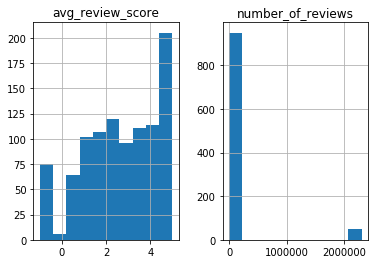

In [20]:
product_features[["number_of_reviews","avg_review_score"]].hist()

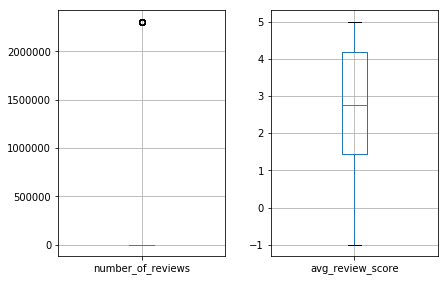

In [21]:
fig, axs = plt.subplots(ncols = 2,figsize=(6,4))
plt.tight_layout(w_pad = 1.5)
product_features[["number_of_reviews"]].boxplot(ax = axs[0])
product_features[["avg_review_score"]].boxplot(ax = axs[1])

Data exploration summary for "product_features": There is no duplicated row; there is no duplicated product_id; there is no missing values. The box plot for "number of reviews" shows there are some outliers. Also, avg_review_score is negetive for some data points.

### Explore "click_history"

In [22]:
print("\'click_history\':",click_history.shape)

'click_history': (35990, 3)


In [23]:
# Which data types does "click_history" contain?
click_history.dtypes

user_id       int64
product_id    int64
clicked        bool
dtype: object

In [24]:
# See the head of "click_history":
click_history.head()

,user_id,product_id,clicked
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True


In [25]:
# Is there any missing values?
click_history.isnull().sum()

user_id       0
product_id    0
clicked       0
dtype: int64

In [26]:
# Is there any douplicated row in the "click_history" dataset?
click_history.duplicated().sum()

0

In [27]:
# Is there any douplicated row in the "click_history" dataset?
click_history.duplicated().sum()

0

Data exploration summary for "click_history": It has 3 features, "user_id" , "product_id" and "clicked". Clicked is Boolean and it would be the target variable. Also, this data set does not have any duplicated rows, duplicated product_id or missing values.

# Question 2: Data Cleaning and Preprocessing

In [28]:
# Remove negetive values of "product_features.avg_review_score"
lab=product_features[product_features.avg_review_score <0].index
product_features.drop(lab, axis=0,inplace=True)

# Merging

In [29]:
# Merge data sets
merged_data=click_history.merge(product_features,on="product_id",how="inner").merge(user_features,on="user_id",how="inner")
merged_data.shape

(33176, 10)

In [30]:
merged_data.head(5)

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests
0,104863,1350,False,nail,False,136,2.653361,2,True,"['hair', 'body']"
1,104863,1617,True,foot,True,279,4.924063,2,True,"['hair', 'body']"
2,104863,1959,False,body,True,540,3.049224,2,True,"['hair', 'body']"
3,104863,1920,False,body,True,776,1.562768,2,True,"['hair', 'body']"
4,104863,1138,False,makeup,True,104,1.996069,2,True,"['hair', 'body']"


In [31]:
merged_data.duplicated().sum()

0

In [32]:
# Character replacement
merged_data.personal_interests=merged_data.personal_interests.str.replace('\[','')
merged_data.personal_interests=merged_data.personal_interests.str.replace('\]','')
merged_data.personal_interests=merged_data.personal_interests.str.replace('\'','')
merged_data.personal_interests=merged_data.personal_interests.str.replace(',','')

In [33]:
# View the head after the latest change
merged_data.head(3)

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests
0,104863,1350,False,nail,False,136,2.653361,2,True,hair body
1,104863,1617,True,foot,True,279,4.924063,2,True,hair body
2,104863,1959,False,body,True,540,3.049224,2,True,hair body


In [34]:
# Split the column of "personal_interests" :
merged_data = merged_data.join(pd.DataFrame(merged_data['personal_interests'].str.split().values.tolist()))
# Drop "personal_interests":
merged_data.drop(['personal_interests'],axis=1,inplace=True)
merged_data.shape

(33176, 19)

In [35]:
merged_data.head(3)

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,0,1,2,3,4,5,6,7,8,9
0,104863,1350,False,nail,False,136,2.653361,2,True,hair,body,None,None,None,None,None,None,None,None
1,104863,1617,True,foot,True,279,4.924063,2,True,hair,body,None,None,None,None,None,None,None,None
2,104863,1959,False,body,True,540,3.049224,2,True,hair,body,None,None,None,None,None,None,None,None


In [36]:
# The aim of this part is to make a dataframe so that all columns of 0 to 9 of merged_data_2 be stacked in one column.

df0=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",0]]
df0.rename(columns={0:'personal_interests'},inplace=True)

df1=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",1]]
df1.rename(columns={1:'personal_interests'},inplace=True)

df2=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",2]]
df2.rename(columns={2:'personal_interests'},inplace=True)

df3=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",3]]
df3.rename(columns={3:'personal_interests'},inplace=True)

df4=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",4]]
df4.rename(columns={4:'personal_interests'},inplace=True)

df5=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",5]]
df5.rename(columns={5:'personal_interests'},inplace=True)

df6=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",6]]
df6.rename(columns={6:'personal_interests'},inplace=True)

df7=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",7]]
df7.rename(columns={7:'personal_interests'},inplace=True)

df8=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",8]]
df8.rename(columns={8:'personal_interests'},inplace=True)

df9=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",9]]
df9.rename(columns={9:'personal_interests'},inplace=True)

mydata=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9])
mydata.drop_duplicates(inplace=True)
mydata.dropna(subset=['personal_interests'],inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [37]:
mydata.shape

(164570, 10)

In [38]:
mydata.nunique()

clicked                       2
product_id                  922
category                     11
on_sale                       2
number_of_reviews           573
avg_review_score            824
user_id                    6554
number_of_clicks_before       7
ordered_before                2
personal_interests           11
dtype: int64

In [39]:
mydata.isnull().sum()

clicked                       0
product_id                    0
category                      0
on_sale                       0
number_of_reviews             0
avg_review_score              0
user_id                       0
number_of_clicks_before    7009
ordered_before                0
personal_interests            0
dtype: int64

In [40]:
# Drop the rows for them "number_of_clicks_before" is missing.
mydata.dropna(subset=['number_of_clicks_before'],inplace=True)

In [41]:
# Convert the categoric and boolean variables to numeric
for col in mydata.columns:
    if mydata[col].dtype in [bool,object] :
        mydata[col]=mydata[col].astype('category').cat.codes       

In [42]:
print("shape of 'mydata':",mydata.shape)
mydata.head()

shape of 'mydata': (157561, 10)


,clicked,product_id,category,on_sale,number_of_reviews,avg_review_score,user_id,number_of_clicks_before,ordered_before,personal_interests
0,0,1350,8,0,136,2.653361,104863,2,1,3
1,1,1617,1,1,279,4.924063,104863,2,1,3
2,0,1959,0,1,540,3.049224,104863,2,1,3
3,0,1920,0,1,776,1.562768,104863,2,1,3
4,0,1138,5,1,104,1.996069,104863,2,1,3


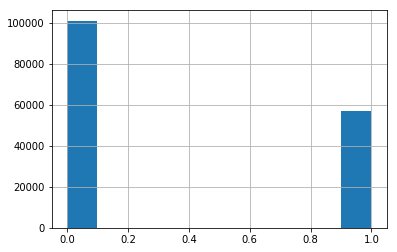

In [43]:
# Is the target variable well_balanced?
mydata.clicked.hist()

It seems that we have more target variables labeled as zero than one. So we are dealing with an imbalanced data.

# Question 3: Model Generation and Evaluation

In [44]:
y=mydata.iloc[:,0]
X=mydata.iloc[:,1:10]

In [45]:
X.head()

,product_id,category,on_sale,number_of_reviews,avg_review_score,user_id,number_of_clicks_before,ordered_before,personal_interests
0,1350,8,0,136,2.653361,104863,2,1,3
1,1617,1,1,279,4.924063,104863,2,1,3
2,1959,0,1,540,3.049224,104863,2,1,3
3,1920,0,1,776,1.562768,104863,2,1,3
4,1138,5,1,104,1.996069,104863,2,1,3


In [46]:
# Split to train and test
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=67)

In [47]:
# Rescale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Fatemeh Goudarzi\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Fatemeh Goudarzi\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [48]:
# Logistic regression
# These three lists will hold the best score, classifier name and the corresponding parameters.
# At the end, I will make a data frame and will find the best classifier. 
# Models comparison is based on AUC_ROC score of the test dataset.
best_scores=[]
best_models=[]
best_params=[]

grid_param={               
            'solver' :['lbfgs', 'liblinear', 'sag', 'saga'], 
            'class_weight':['balanced',None],
            'C':[0.00001,0.0001,0.001,0.01]   
            }   

best_score=0
c_train_score=0
parameters=[]
lr_test_auc_scores=[] 

for p in ParameterGrid(grid_param):
    clf= linear_model.LogisticRegression()
    clf.set_params(**p)

    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    
    lr_train_pred=fitted.predict(X_train_scaled)
    lr_test_pred=fitted.predict(X_test_scaled)
    
    lr_train_auc = metrics.roc_auc_score(y_train,lr_train_pred)
    lr_test_auc = metrics.roc_auc_score(y_test,lr_test_pred)
    lr_test_auc_scores.append(lr_test_auc)

    if lr_test_auc > best_score:
            best_param=p
            best_score=lr_test_auc
            c_train_score=lr_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),' ,correspinding train score:',"{:.2%}".format(c_train_score))

best_scores.append(best_score)
best_models.append("Logestic Regression")
best_params.append(best_param)

{'C': 0.0001, 'class_weight': 'balanced', 'solver': 'liblinear'} , best score: 58.53%  ,correspinding train score: 58.76%


In [49]:
# Decision Tree
grid_param={'criterion':['gini','entropy'],
            'max_depth':range(3,20)
            }   

best_score=0
c_train_score=0
parameters=[]
dt_test_auc_scores=[]

for p in ParameterGrid(grid_param):
    clf= tree.DecisionTreeClassifier()
    clf.set_params(**p)

    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    
    dt_train_pred=fitted.predict(X_train_scaled)
    dt_test_pred=fitted.predict(X_test_scaled)
    
    dt_train_auc = metrics.roc_auc_score(y_train,dt_train_pred)
    dt_test_auc = metrics.roc_auc_score(y_test,dt_test_pred)
    dt_test_auc_scores.append(dt_test_auc)

    if dt_test_auc > best_score:
            best_param=p
            c_train_score=dt_train_auc
            best_score=dt_test_auc            
print (best_param, ", best test score:","{:.2%}".format(best_score),' ,correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("Decision Tree")
best_params.append(best_param)

{'criterion': 'gini', 'max_depth': 19} , best test score: 93.38%  ,correspinding train score: 95.68%


In [50]:
# Naive Bayes
   
clf= GaussianNB(priors=None, var_smoothing=1e-09)

clf.fit(X_train_scaled,y_train)

nb_train_pred=fitted.predict(X_train_scaled)
nb_test_pred=clf.predict(X_test_scaled)

nb_test_auc = metrics.roc_auc_score(y_test,nb_test_pred)
nb_train_auc = metrics.roc_auc_score(y_train,nb_train_pred)

print("test score","{:.2%}".format(nb_test_auc),' ,correspinding train score:',"{:.2%}".format(nb_train_auc))
best_scores.append(nb_test_auc)
best_models.append("GaussianNB")
best_params.append({'priors':None, 'var_smoothing':1e-09})

test score 54.79%  ,correspinding train score: 92.84%


In [51]:
# Neural Networks
# rescale data to [0, 1]
scaler = MinMaxScaler()
X_train_MMscaled = scaler.fit_transform(X_train)
X_test_MMscaled = scaler.transform(X_test)

grid_param={
            'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver':['adam'],
            'hidden_layer_sizes': [10,20,30,(5,5,5),(40,20)],
            'alpha': [0.0001,0.001,0.01,1,10],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'max_iter':[1000],
}

param_list = list(ParameterSampler(grid_param, n_iter=10))

best_score=0
c_train_score=0
parameters=[]
nn_test_auc_scores=[]
 
for p in param_list:
    clf=MLPClassifier()
    clf.set_params(**p)   
    parameters.append(p)
    fitted=clf.fit(X_train_MMscaled,y_train)
    
    nn_train_pred=fitted.predict(X_train_MMscaled)
    nn_test_pred=fitted.predict(X_test_MMscaled)
    nn_train_auc = metrics.roc_auc_score(y_train,nn_train_pred)
    nn_test_auc = metrics.roc_auc_score(y_test,nn_test_pred)
    nn_test_auc_scores.append(nn_test_auc)

    if nn_test_auc > best_score:
            best_param=p
            best_score=nn_test_auc
            c_train_score=nn_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),', correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("Neural Networks")
best_params.append(best_param)

C:\Users\Fatemeh Goudarzi\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


{'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': (40, 20), 'alpha': 0.001, 'activation': 'tanh'} , best score: 65.59% , correspinding train score: 66.63%


In [52]:
# Random Forest
grid_param={
            'n_estimators':[150,200,250],
            'max_features':['auto','log2'],
            'max_depth':[3,10,15,20]   
            }   

best_score=0
c_train_score=0
parameters=[]
rf_test_auc_scores=[]
   
for p in ParameterGrid(grid_param):
    clf= RandomForestClassifier(n_jobs=-1)
    clf.set_params(**p)

    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    rf_train_pred=fitted.predict(X_train_scaled)
    rf_test_pred=fitted.predict(X_test_scaled)
    
    rf_train_auc = metrics.roc_auc_score(y_train,rf_train_pred)
    rf_test_auc = metrics.roc_auc_score(y_test,rf_test_pred)
    rf_test_auc_scores.append(rf_test_auc)

    if rf_test_auc > best_score:
            best_param=p
            best_score=rf_test_auc
            c_train_score=rf_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),', correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("Random Forest")
best_params.append(best_param)

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 250} , best score: 95.14% , correspinding train score: 99.32%


In [53]:
# Support Vector Machine
grid_param={
            'kernel':['linear', 'poly', 'rbf'], 
            'degree' : [2,3]
            }   

best_score=0
c_train_score=0
parameters=[]
svm_test_auc_scores=[]
   
for p in ParameterGrid(grid_param):
    clf = svm.SVC(gamma='auto',max_iter=-1,class_weight='balanced')
    clf.set_params(**p)

    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    svm_train_pred=fitted.predict(X_train_scaled)
    svm_test_pred=fitted.predict(X_test_scaled)
    
    svm_train_auc = metrics.roc_auc_score(y_train,svm_train_pred)
    svm_test_auc = metrics.roc_auc_score(y_test,svm_test_pred)
    svm_test_auc_scores.append(svm_test_auc)

    if svm_test_auc > best_score:
            best_param=p
            best_score=svm_test_auc
            c_train_score=svm_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),', correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("SVM")
best_params.append(best_param)

{'degree': 2, 'kernel': 'rbf'} , best score: 60.84% , correspinding train score: 61.26%


In [54]:
# Ada Boosting
grid_param={
            'n_estimators':[50, 100, 150], 
            'learning_rate' : [0.0001,0.001,0.001,0.1,1],
            }   

best_score=0
c_train_score=0
parameters=[]
adb_test_auc_scores=[]
   
for p in ParameterGrid(grid_param):
    clf = AdaBoostClassifier()
    clf.set_params(**p)

    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    adb_train_pred=fitted.predict(X_train_scaled)
    adb_test_pred=fitted.predict(X_test_scaled)
    
    adb_train_auc = metrics.roc_auc_score(y_train,adb_train_pred)
    adb_test_auc = metrics.roc_auc_score(y_test,adb_test_pred)
    adb_test_auc_scores.append(adb_test_auc)

    if adb_test_auc > best_score:
            best_param=p
            best_score=adb_test_auc
            c_train_score=adb_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),', correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("Adb")
best_params.append(best_param)

{'learning_rate': 1, 'n_estimators': 150} , best score: 72.90% , correspinding train score: 72.90%


# Question 4: Which model has the best performance? What have you learned from the models you built? (10 points)

In [55]:
# Make a dataframe which contains models name as index and the corresponding best score and parameters.
result=pd.DataFrame({"Test_Score":best_scores,"Param":best_params},index=best_models)
result=result.sort_values("Test_Score", ascending = True)

<BarContainer object of 7 artists>

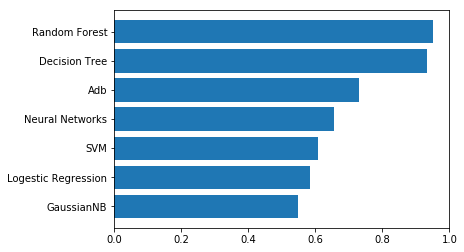

In [56]:
plt.barh(result.index,result.Test_Score)

In [57]:
m=max(result.Test_Score)
result[result.Test_Score==m]

,Test_Score,Param
Random Forest,0.951444,"{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 250}"


In [61]:
# Build the model again the best classifier with the best parameters
clf= RandomForestClassifier(n_jobs=-1,max_depth= 20, max_features= 'log2', n_estimators= 250)
clf.fit(X_train_scaled,y_train)
clf_y_test_pred=clf.predict(X_test_scaled)
print("roc_auc_score:","{:.2%}".format(metrics.roc_auc_score(y_test,clf_y_test_pred)))
print("accuracy:","{:.2%}".format(metrics.accuracy_score(y_test,clf_y_test_pred)))
print("precision:","{:.2%}".format(metrics.precision_score(y_test,clf_y_test_pred)))
print("recall:","{:.2%}".format(metrics.recall_score(y_test,clf_y_test_pred)))
print("f1:","{:.2%}".format(metrics.f1_score(y_test,clf_y_test_pred)))
print(metrics.confusion_matrix(y_test,clf_y_test_pred))

roc_auc_score: 95.03%
accuracy: 95.36%
precision: 93.27%
recall: 93.86%
f1: 93.56%
[[29135  1151]
 [ 1043 15940]]


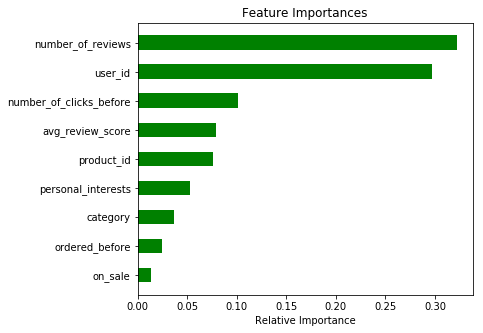

In [62]:
features=X.columns 
importances = clf.feature_importances_  

#Build a dataframe form features and the corresponding importance 
feature_importance=pd.DataFrame(importances,index=features,columns=['importance']).sort_values('importance',ascending=True)

#Draw feature importance bar plot
plt.figure(figsize=(6,5))
plt.title('Feature Importances')
plt.barh(feature_importance.index ,feature_importance.importance, color='green', align='center',height=0.5)
plt.xlabel('Relative Importance')
plt.show()

Random Forest has the highest roc_auc score for the test dataset. "Number of reviwes" and "user_id" were the most important features respectively. 
Data understanding and data cleansing was the hardest, the most time-consuming and the most important part. The quality of this part can greatly affect the quality of rest of work. 
Amongst different classifiers, SVM was the slowest. 